# (Exploration Ford Bike System Data 2017)

## Investigation Overview

>  I chose the Ford GoBike dataset in order to investigate bike rentals by different people. There are a lot of different variables and our main focus is on identifying the most common variables that affect bike rental in a project.

## Dataset Overview

> 
There are many variables in the data within 16 different variables representing different data such as (age, gender, days, duration, etc.). The data also contains approximately 3.31 billion records.
This document explores general Ford GoBike cycling trip data that includes the year 2017. Features included the start / end time of the trip, plus additional metrics such as user type, gender, and age.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
da = pd.read_csv('2017-fordgobike-tripdata.csv')
da.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


In [3]:
da.drop(['start_station_id','end_station_id','start_station_latitude','start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1, inplace=True)

In [4]:
da['start_time'] = pd.to_datetime(da['start_time'])
da['end_time'] = pd.to_datetime(da['end_time'])
da['hourofday'] = da.start_time.dt.strftime('%H')
da['month'] = da['start_time'].apply(lambda x: x.strftime('%B').lower())
da['day_of_week'] = da['start_time'].apply(lambda x: x.strftime('%A').lower())

In [5]:
day_orginze = ['monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday','sunday']
da['day_of_week'] = pd.Categorical(da['day_of_week'],categories= day_orginze,  ordered = True)

In [6]:
da['duration_min']= da['duration_sec'] / 60

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (The most use period and days)

> We also note that on weekends, users use longer bicycles than on the rest of the week. Suppose they are busy during their shift hours during workdays, and we notice an increase in the duration of use at the end of the weekends.

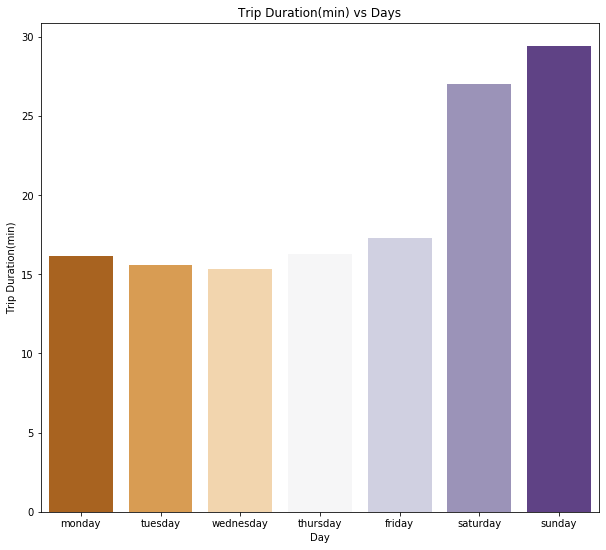

In [7]:
plt.figure(figsize = [10,9])
ax1 = sb.barplot(data=da,x='day_of_week',y='duration_min', color=sb.color_palette()[0], palette="PuOr", ci=None)
plt.xlabel('Day')
plt.ylabel('Trip Duration(min)')
plt.title('Trip Duration(min) vs Days');
plt.xticks(rotation = 0);

## (Relationship of customer and subscribers)

 > We can see in the graph that on weekends the number of customers and subscriber numbers are close, and this shows us that the numbers of subscribers and customers are more than on normal days

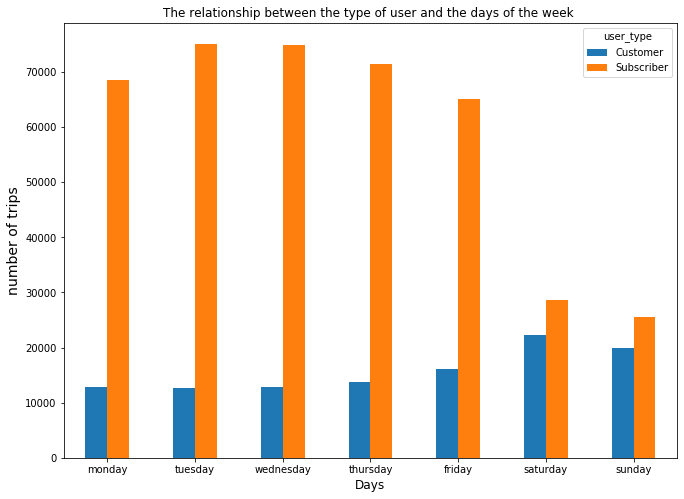

In [8]:
ax1 = pd.crosstab(da['day_of_week'], da['user_type']).plot(kind='bar', stacked=False, title='The relationship between the type of user and the days of the week ',figsize=(11,8));
ax1.set_xlabel("Days",fontsize=12);
plt.xticks(rotation = 0)
ax1.set_ylabel("number of trips",fontsize=14);


## (The most time to start a bike ride)

> We notice through the graphic illustration, that the users and subscribers start a riding trip at multiple times, but at 3AM, the users and participants have the most time to ride the cycling


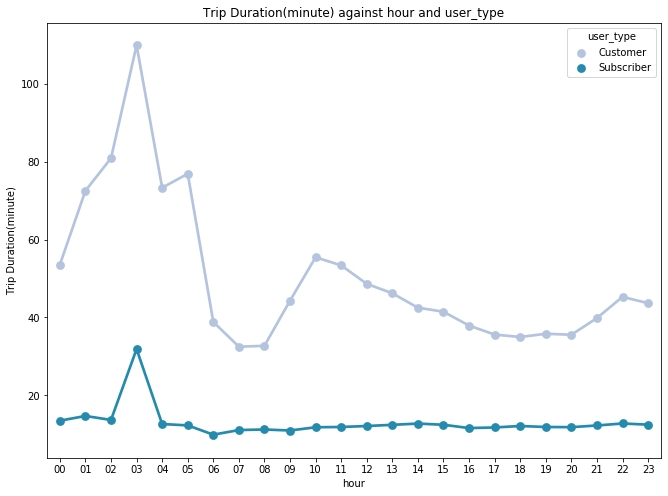

In [9]:
plt.figure(figsize = [11,8]);

axx = sb.pointplot(data=da,x='hourofday',y='duration_min',hue='user_type' ,color=sb.color_palette()[0], palette='PuBuGn', ci=None);
plt.xlabel('hour');
plt.ylabel('Trip Duration(minute)');
plt.title('Trip Duration(minute) against hour and user_type');
plt.xticks(rotation = 0);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
! jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle